### Preprocessing

In [63]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [64]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# import custom packages
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [66]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [67]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [68]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [69]:
Hitters.shape

(263, 21)

In [70]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [71]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


### Split dataset into training and test dataset (and standardise them)

In [72]:
from sklearn.model_selection import train_test_split
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Partial least squares regression

In [84]:
from sklearn.cross_decomposition import PLSRegression as PLS
from sklearn.preprocessing import scale

In [85]:
n = len(X_train)
n

131

In [75]:
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
kf10 = KFold(n_splits=10, shuffle=True, random_state=1)

RMSEdf = pd.DataFrame()

for i in np.arange(1, 20):
    pls = PLS(n_components=i)
    MSE = -1*cross_val_score(pls, scale(X_train), y_train, cv=kf10, scoring='neg_mean_squared_error').mean()
    RMSEdf = RMSEdf.append([pow(MSE, 0.5)])
    
RMSEdf.columns = ['MSE']
RMSEdf.reset_index(drop=True, inplace=True)
RMSEdf.index = RMSEdf.index + 1
RMSEdf

,MSE
1,299.830590
2,297.146335
3,301.777694
4,308.175398
5,316.541535
6,326.370107
7,330.463183
8,326.344843
9,317.797630
10,314.374675


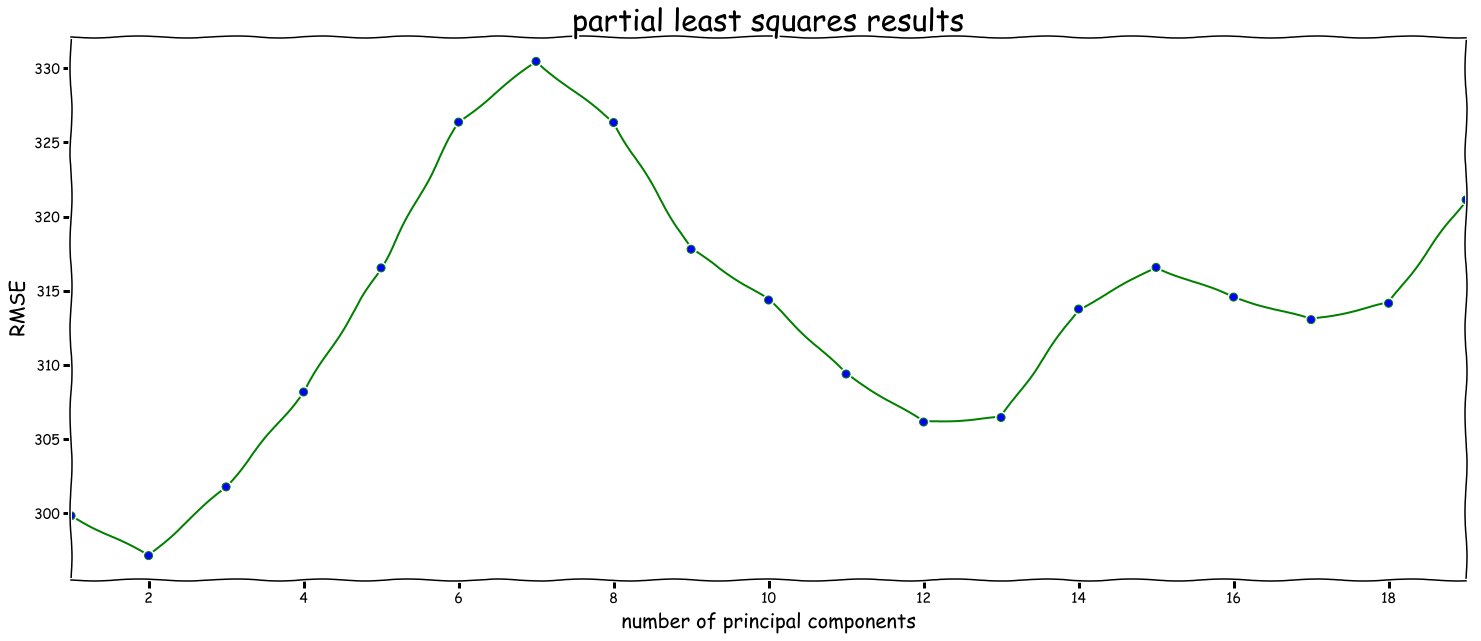

In [76]:
# Plot of PCR results
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(RMSEdf, '-', marker = 'o', markerfacecolor='blue', markersize=8, color='green')
plt.xlabel('number of principal components', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.title('partial least squares results', fontsize=30)
plt.xlim(xmin=1)
plt.xlim(xmax=19);

**The lowest RMSE is when I regress using 2 principal components using partial least squares.**

In [77]:
pls2 = PLS(n_components=2, scale=True)
pls2.fit(scale(X_train), y_train)

pls2pred = pls2.predict(scale(X_test))
print(np.sqrt(mean_squared_error(y_test, pls2pred)))

388.0716413733057


In [83]:
explained_variance_ratio_test = np.var(scale(X_test), axis=0) / np.sum(np.var(scale(X_test), axis=0))
EVR2 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])
EVR2.index = EVR2.index + 1
EVR2

,Explained Variance Ratio
1,5.26
2,10.52
3,15.78
4,21.04
5,26.30
6,31.56
7,36.82
8,42.08
9,47.34
10,52.60
